<img src="../assets/images/Cover.png" alt="Cover" title="AI2E Cover" />

## AI2E - 4 -  Supervised Learning Algorithms 
In this workshop, you will learn more about some powerful supervised learning algorithms such as : Support vector machines, k-nearest neighbours, Tree Based models and Naive Bayes. We hope you will find it useful. Feel free to ask any questions! 


### Content 

1. Support vector machines
2. Tree-based models

    2.1 Random Forests
    2.2. Boosting trees
    - Gradient Boosted trees

3. The K-Nearest Neighbors method
4. Naive Bayes Classification

    4.1 Gaussian Naive Bayes
    
    4.2 Multinomial Naive Bayes



In [2]:
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors, svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from random import randint
%matplotlib inline

#### Dataset Description :
The iris dataset consists of 3 different types of irises’(flowers) (Setosa, Versicolour, and Virginica).
It contains 150 samples with 4 features for each : Sepal Length, Sepal Width, Petal Length and Petal Width.

![image](images/irisFlowers.JPG)

In [2]:
iris = datasets.load_iris()   
X = iris.data[:, :2]    #extract the first two features
y = iris.target

h = .02  # step size in the mesh(used for plotting decision regions)
cmap = cm.get_cmap('Pastel2',3)       #setting colors 
cmap2 = cm.get_cmap('Set1')


## 1. Support Vector Machines (SVM) : 

In [3]:
# we generate two matrices containing all combinations of the first and second feature from X1.min to X1.max 
# and from X2.min to X2.max.
# we need those points to draw decision regions with the decision boundaries.

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#### Different kernels :
let's see the impact of changing the kernel on our predictions !

In [4]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),                 #we instanciate models with different kernels
          svm.SVC(kernel='poly', degree=2, C=C),
         svm.SVC(kernel='poly', degree=5, C=C),)

models = tuple((clf.fit(X, y) for clf in models))

titles = ('SVC with linear kernel',
          'SVC with (Gaussian) RBF kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 5) kernel',
          )

In [5]:
def plottingFunction(fittedModelsList, titlesList, figsize):
        
    nbrRows = ceil(len(fittedModelsList) / 2)
    fig, sub = plt.subplots(nbrRows, 2, figsize = (figsize,figsize))     #setting number of our subplots
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for clf, title, ax in zip(fittedModelsList, titlesList, sub.flatten()):       #for every model
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                          #we make predictions
        Z = Z.reshape(xx.shape)                                                  
        out = ax.contourf(xx, yy, Z, cmap=cmap)          #plot the decision regions (each region represents a class)
        ax.scatter(X[:, 0], X[:, 1], c=y, s=22, cmap=cmap2, edgecolors='k')     #plot our training set datapoints 
        ax.set_xlim(xx.min(), xx.max())                                         #(different colors for different classes)
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_title(title)

    plt.show()

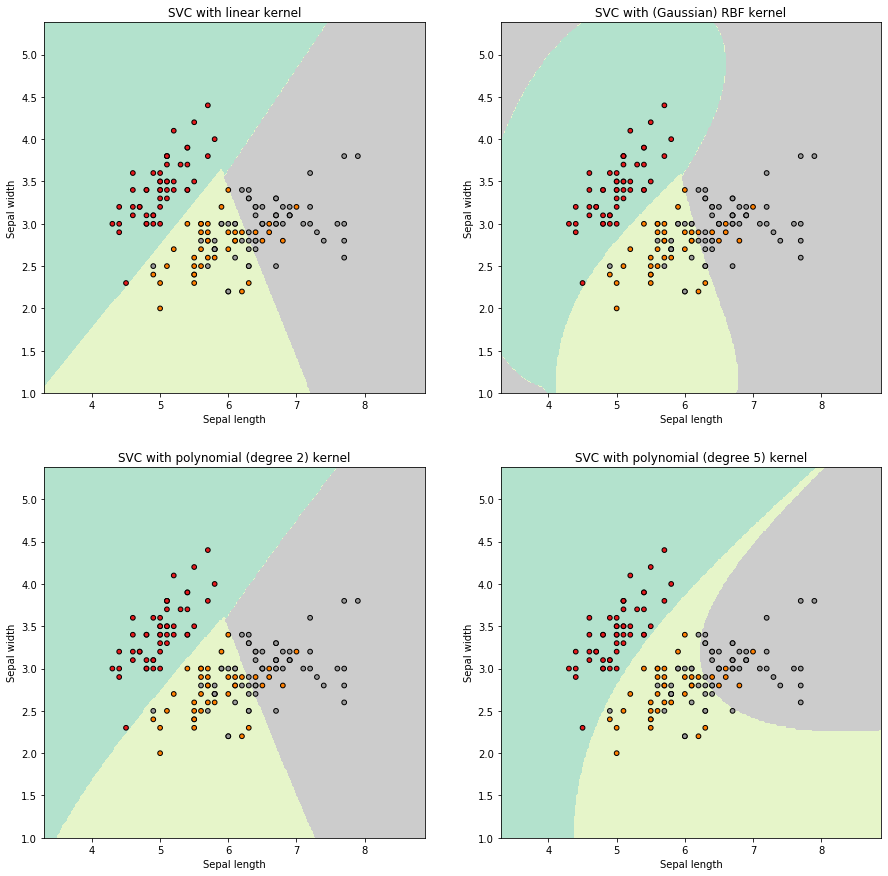

In [6]:
plottingFunction(models, titles,15)

#### Regularization parameter :
let's see the impact of changing the Regularization parameter on our predictions :

In [7]:
models = (svm.SVC(kernel='rbf', C=0.1),
          svm.SVC(kernel='rbf',  C=1),
          svm.SVC(kernel='rbf', C=10),
         svm.SVC(kernel='rbf',   C=100))
models = tuple((clf.fit(X, y) for clf in models))

titles = ('SVC with C = 0.1',
          'SVC with C = 1',
          'SVC with C = 10',
          'SVC with C = 100')

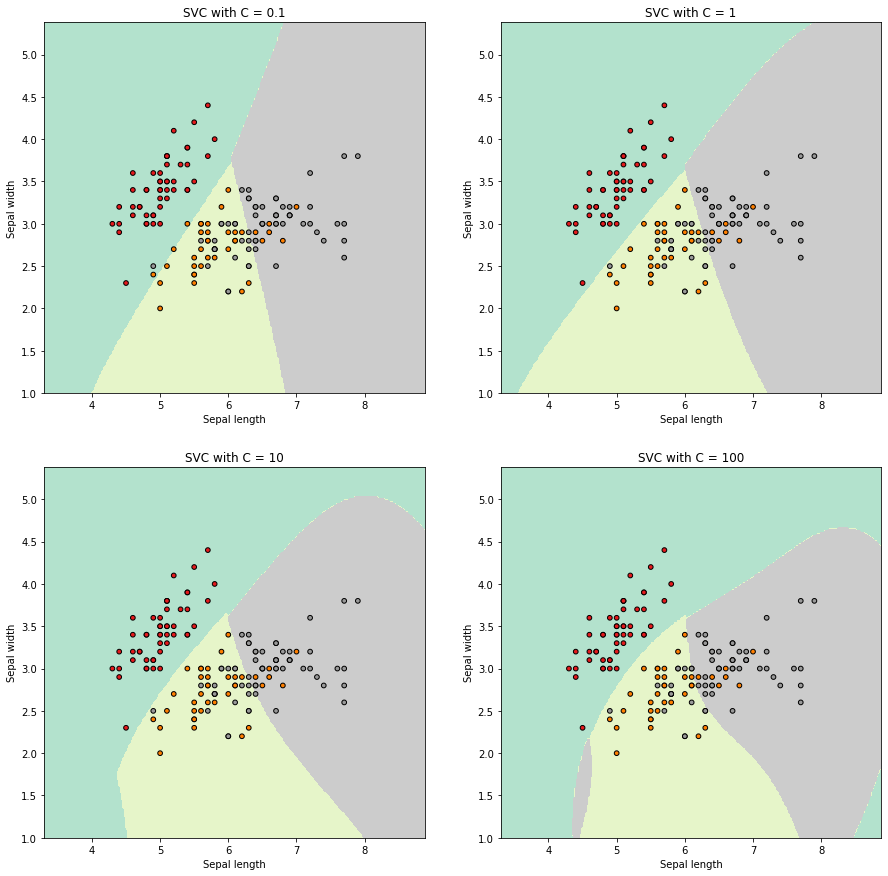

In [8]:
plottingFunction(models, titles,15)

## 2. Tree based models : 
### 2.1 Decision Trees :


In [9]:
#We instanciate our model
clf = DecisionTreeClassifier(random_state=1, max_depth=4) #max depth of a decision tree 
clf.fit(X, y)     #fitting the model to training set

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

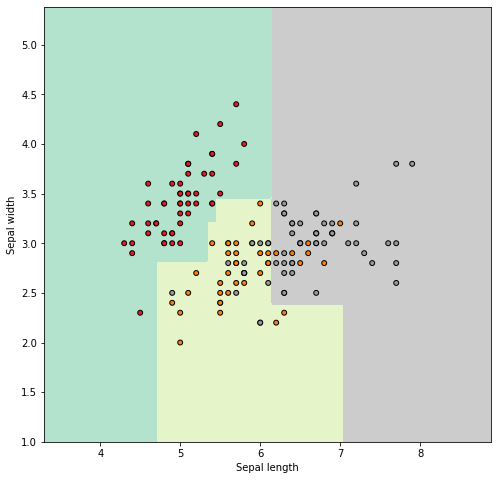

In [10]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   #making predictions
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
out = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=24, cmap=cmap2, edgecolors='k', marker="o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### 2.1 Random forests :


In [14]:
clf = RandomForestClassifier(random_state=1, n_estimators = 10, max_depth=2)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

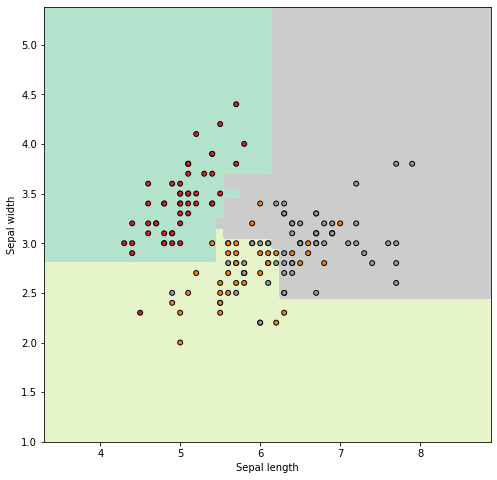

In [15]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
out = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=24, cmap=cmap2, edgecolors='k', marker="o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### 2.1 Boosting Trees :
#### Gradient Boosted trees : 

In [16]:
clf = GradientBoostingClassifier(random_state=1,) # we initialise a gradient boosting classifier

In [17]:
paramsGB = {'n_estimators' : [10, 100, 500],         # we define a grid of the most important parameters 
    'learning_rate': [0.1, 0.4, 0.8],               
    'max_depth' : [2, 4, 10]
}

In [18]:
gridGB = GridSearchCV(estimator=clf,               # we do a grid search which means a search over all parameters combinations
                       param_grid=paramsGB,         # cv = 3 for cross validation splitting strategy
                       scoring='accuracy',           # here it means: we split our dataset set to 3 subsets and each time 
                       cv=3,                         # we train our models on 2 subset and evaluate it on the third one
                       verbose=1,
                       n_jobs=-1,
                        return_train_score = True)
gridGB.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [19]:
df = pd.DataFrame(gridGB.cv_results_)

In [20]:
df[['param_learning_rate', 'param_max_depth','param_n_estimators','mean_train_score','mean_test_score', 'rank_test_score']]

,param_learning_rate,param_max_depth,param_n_estimators,mean_train_score,mean_test_score,rank_test_score
0,0.1,2,10,0.820000,0.800000,1
1,0.1,2,100,0.916667,0.720000,14
2,0.1,2,500,0.953333,0.720000,14
3,0.1,4,10,0.900000,0.733333,7
4,0.1,4,100,0.953333,0.720000,14
5,0.1,4,500,0.953333,0.733333,7
6,0.1,10,10,0.953333,0.686667,27
7,0.1,10,100,0.953333,0.706667,24
8,0.1,10,500,0.953333,0.733333,7
9,0.4,2,10,0.880000,0.760000,2


In [21]:
best_model = gridGB.best_estimator_ #we select the best model after parameter tuning
best_model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

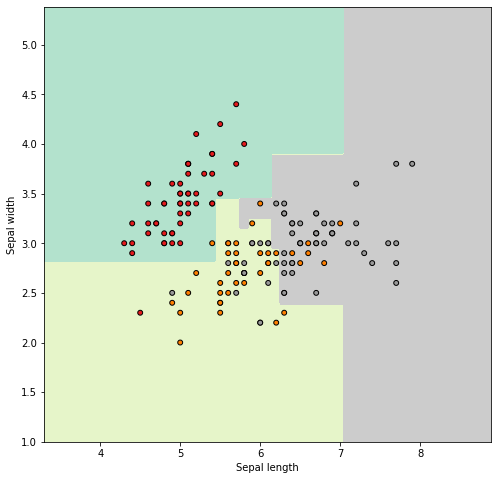

In [22]:
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])   #making predictions using the best model
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
out = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=24, cmap=cmap2, edgecolors='k', marker="o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# The K-Nearest Neighbors method

K-NN is another popular classification algorithm, albeit a very simple one, it belongs to the supervised set of machine learning algorithms.

The algorithm works by considering the $k$ nearest neighbors to each new individual to be classified, where $k$ is a hyperparameter, the class affected to the individual is the most recurrent class of the neighbors.

![img](images/KnnClassification.svg)

In the example above, if we took $k=3$, the new individual would be classified as ..., but if $k=5$, as ...

(Multiple metrics can be used, but the most common ones are [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) and [Manhattan Distance](https://fr.wikipedia.org/wiki/Distance_de_Manhattan))

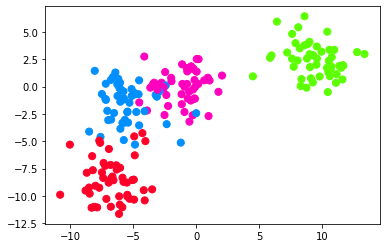

In [3]:
# generate some data, classified into 4 classes, based on two features
X, y = datasets.make_blobs(200, 2, centers=4, random_state=3965696633, cluster_std=1.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow');

<Figure size 432x288 with 0 Axes>

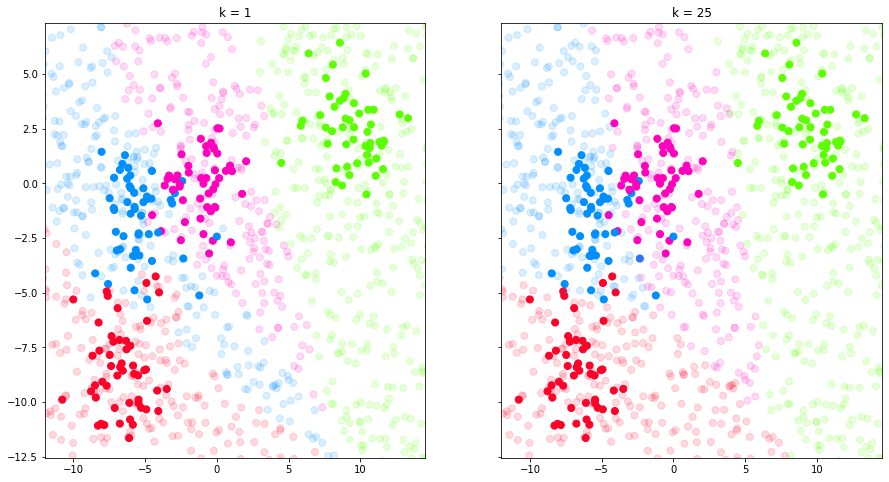

In [4]:
# generate random individuals to classify
rng = np.random.RandomState(0)
Xnew = [-14, -14] + [30, 40] * rng.rand(2000, 2)
# the K values we will try
k_values = [1, 25]
# create two subplots
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = len(k_values), figsize=(15,8), sharex=True, sharey = True)
# for every K value, try classifying the new individuals with K-NN
for i, k in enumerate(k_values):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    ynew = model.predict(Xnew)
    # plot the original data
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
    axes[i].set_title('k = ' + str(k))
    lim = axes[i].axis()
    # plot the new individuals
    axes[i].scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='gist_rainbow', alpha=0.15)
    plt.axis(lim);


### Choosing the right value of $k$

The $k$ hyperparameter plays a key role in the classification process.

- Small values of $k$ make the model more sensitive to noise (as fewer samples are used for classifying data)
- large values of $k$ take the algorithm slower as more computations are needed for visiting neighbors

In order to get a good tradeoff, we can apply validation techniques, which are based on experimentation, such as k-fold cross-validation, we can choose a good value of $k$ either by calculating the misclassification error for each $k$ value, and choosing the $k$ that yields a minimum, or by plotting the accuracy for different values of $k$, and choosing the $k$ that maximizes it.

# Naive Bayes Classification


Naive Bayes is a group of very fast classification algorithms, based on Bayes's theorem

$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$

Since what we want is to find the label with maximum probability given a list of features $a_i$, the probability of a given label $y$ can be written as

$P(y|a_1,a_2,...,a_n) = \frac{P(a_1|y)\times P(a_2|y) \times ... \times P(a_n|y) \times P(y)} { P(a_1) \times P(a_2) \times ... \times P(a_n)}$

We notice that the denominator does not depend on $y$, as we are interested in finding the value of $y$ which maximizes the probability, it's enough to maximize the numerator

$y_m = Argmax_y\{ P(y) \prod_{i=1}^n P(a_i | y) \}$

The term Naive comes from the fact that these algorithms take very naive assumptions on the dataset they are applied on, for example, that the features are independent ($P(a_i,a_j) = P(a_i)P(a_j), \forall i,j \in \{1,...,n\}$), which is rarely the case on real-world datasets.

In the next sections, we'll explore some Naive Bayes models.

### Gaussian Naive Bayes

When the features take continuous values (as opposed to discrete), we take the assumption that they are sampled from the [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) (or Normal Distribution), and as we know the [probability-density function](https://en.wikipedia.org/wiki/Probability_density_function) of the Gaussian distribution, we calculate probabilities and determine classes (as seen above).

Let's first generate some data that is classified into four classes, based on two features.

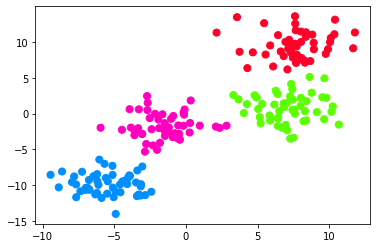

In [5]:
X, y = datasets.make_blobs(200, 2, centers=4, random_state=8, cluster_std=1.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow');

We generate a Gaussian Naive Bayes model

In [ ]:
model = GaussianNB()
# complete the following line: fit the model on the dataset


We use it to predict the class of new individuals

In [ ]:
# generate new random data
rng = np.random.RandomState(0)
Xnew = [-14, -14] + [30, 40] * rng.rand(2000, 2)
# predict the classification of the new individuals
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='gist_rainbow', alpha=0.15)
plt.axis(lim);


### Multinomial Naive Bayes

This model is used often to classify text, we now consider that the features are sampled from a Multinomial Distribution, which could be the frequencies of appearance of words for example.

We do the same calculations as above, except that this time, it might be useful to apply logarithms to prevent underflow , if the frequency of word $i$ is $fi$, we would have:

$y_m = Argmax_y\{ log(P(y)) + \sum_{i=1}^n f_i\times P(a_i | y) \}$

Let's classify articles based on their category (`sports`, `politics` or `tech`).

In [6]:
# lets retrieve dataset categories
categories = [x for x in datasets.fetch_20newsgroups().target_names if any(word == x for word in ['rec.sport.baseball', 'talk.politics.misc', 'comp.sys.ibm.pc.hardware'])]
print(categories)

['comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'talk.politics.misc']


In [ ]:
# lets download the datasets
train_data = datasets.fetch_20newsgroups(subset='train', categories=categories)
test_data = datasets.fetch_20newsgroups(subset='test', categories=categories)
# print sample article
print(train_data.data[1])

In [ ]:
# data goes first through the CountVectorizer, which extracts features as the counts of words
model = make_pipeline(CountVectorizer(), MultinomialNB())
# fit the model
model.fit(train_data.data, train_data.target)

In [ ]:
to_predict = ["the RAM memory is limited",
              "The russian foregin minister",
              "The objective of the defensive team is to prevent batters from becoming runners"] # this one from Wikipedia
for individual in to_predict:
    class_id1 = model.predict([individual])
    print("{} =====> {}".format(individual, train_data.target_names[class_id1[0]]))

### Conclusion 

Classification is a very recurring problem in Engineering, whether it's applied to images, text, sound or other datatypes, choosing the right algorithm for the task is very important